In [ ]:
# EDA – Fraud_Data.csv (E-commerce Transactions)

## Objective
This notebook explores and analyzes the e-commerce fraud dataset to:
- Understand the structure of the data
- Identify missing values and data quality issues
- Analyze class imbalance
- Extract initial insights related to fraudulent behavior


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [5]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")

fraud_df.head()
fraud_df.shape
fraud_df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [3]:
fraud_df.info()
fraud_df.isnull().sum()
fraud_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


np.int64(0)

In [4]:
fraud_df['class'].value_counts()
fraud_df['class'].value_counts(normalize=True) * 100


class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

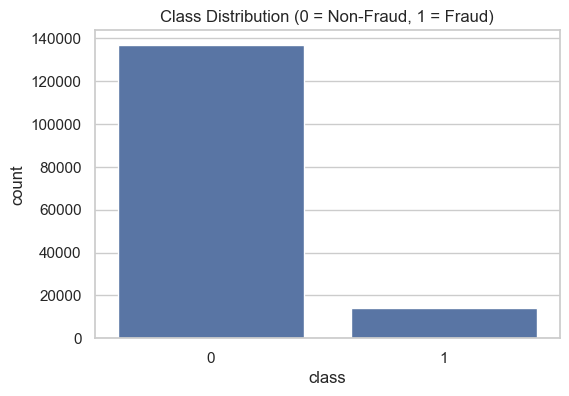

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


In [ ]:
## Class Imbalance Observation

The dataset is imbalanced, with non-fraudulent transactions (class = 0)
accounting for approximately 90.6% of the data, while fraudulent
transactions (class = 1) represent about 9.4%.

This imbalance indicates that accuracy alone would be a misleading
evaluation metric, as a model could achieve high accuracy by predicting
the majority class only. Therefore, specialized techniques such as
resampling methods and evaluation metrics tailored for imbalanced
classification (e.g., Precision, Recall, F1-score, and AUC-PR) will be
required in later stages of the project.


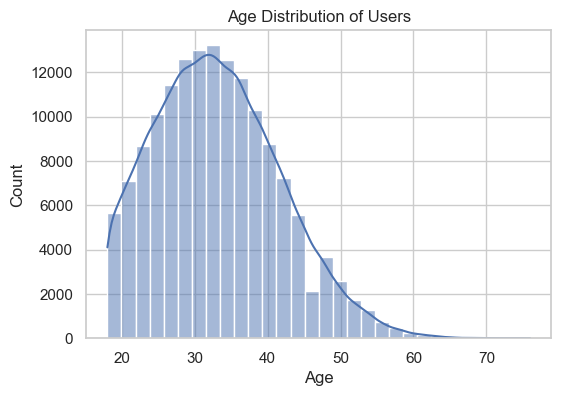

In [6]:
plt.figure(figsize=(6,4))
sns.histplot(fraud_df['age'], bins=30, kde=True)
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [ ]:
## Age Distribution Insight

The age distribution shows the general age range of users making transactions.
This helps identify whether the platform is mostly used by younger or older users,
which may later be compared against fraud patterns.


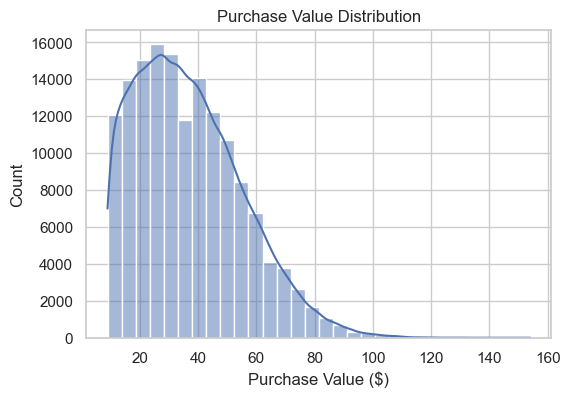

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(fraud_df['purchase_value'], bins=30, kde=True)
plt.title("Purchase Value Distribution")
plt.xlabel("Purchase Value ($)")
plt.ylabel("Count")
plt.show()


In [ ]:
## Purchase Value Insight

Most transactions have relatively low purchase values, with fewer high-value
transactions. High purchase values may carry higher fraud risk and will be
analyzed further in relation to the target variable.


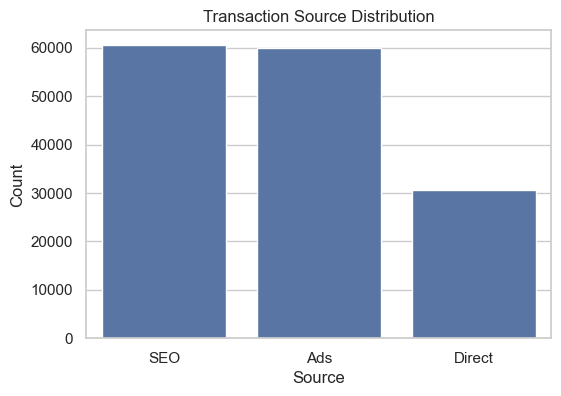

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='source', data=fraud_df)
plt.title("Transaction Source Distribution")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()


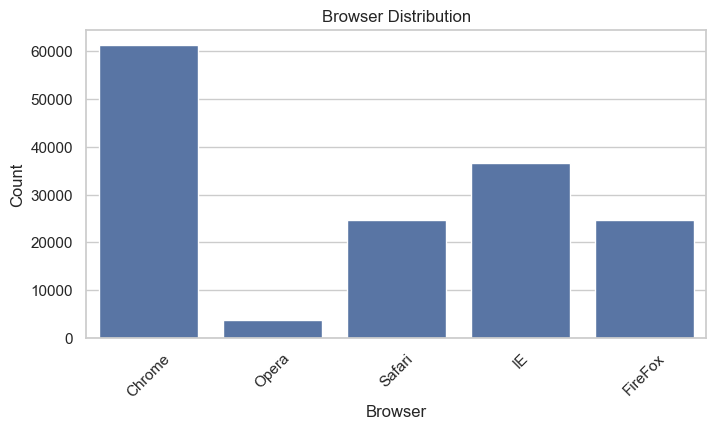

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x='browser', data=fraud_df)
plt.title("Browser Distribution")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Categorical Feature Insights

Different sources and browsers show varying usage frequencies.
These categorical features may capture behavioral patterns that
help distinguish fraudulent and legitimate transactions.
As we see in the graph chrome is the most used browser and opera is the least used browser.
In sources SEO and Ads have high transaction 

In [ ]:
# Bivariate Analysis

This section explores the relationship between selected features and the target
variable (`class`) to identify patterns that differentiate fraudulent and
non-fraudulent transactions.


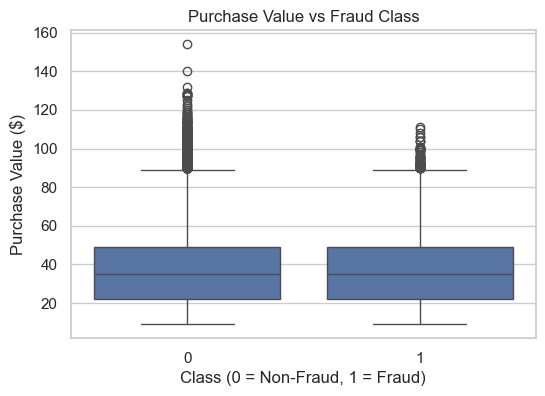

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value vs Fraud Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Purchase Value ($)")
plt.show()


In [ ]:
## Purchase Value vs Fraud

The distribution of purchase values differs between fraudulent and
non-fraudulent transactions. Fraudulent transactions tend to exhibit
higher variability and include more extreme purchase values compared
to legitimate transactions.

This suggests that unusually high purchase amounts may be associated
with increased fraud risk and could be a useful signal for modeling.


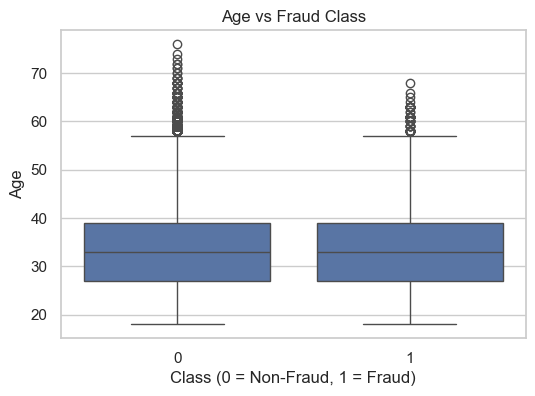

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='age', data=fraud_df)
plt.title("Age vs Fraud Class")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Age")
plt.show()


In [ ]:
## Age vs Fraud

The age distributions for fraudulent and non-fraudulent transactions
largely overlap, indicating that age alone may not be a strong predictor
of fraud. However, subtle differences in distribution suggest that age
could still contribute when combined with other features.


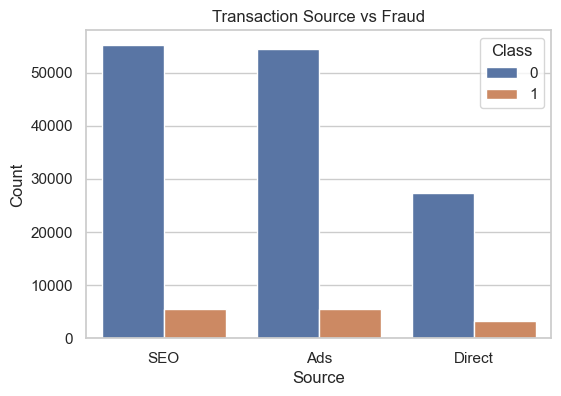

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='source', hue='class', data=fraud_df)
plt.title("Transaction Source vs Fraud")
plt.xlabel("Source")
plt.ylabel("Count")
plt.legend(title="Class")
plt.show()


In [ ]:
## Source vs Fraud

Certain traffic sources show a higher proportion of fraudulent
transactions relative to others. This indicates that the acquisition
channel may influence fraud risk and should be considered as an
important categorical feature during modeling.
As it shows, SEO and Ads source have more Fraud than direct transaction source.

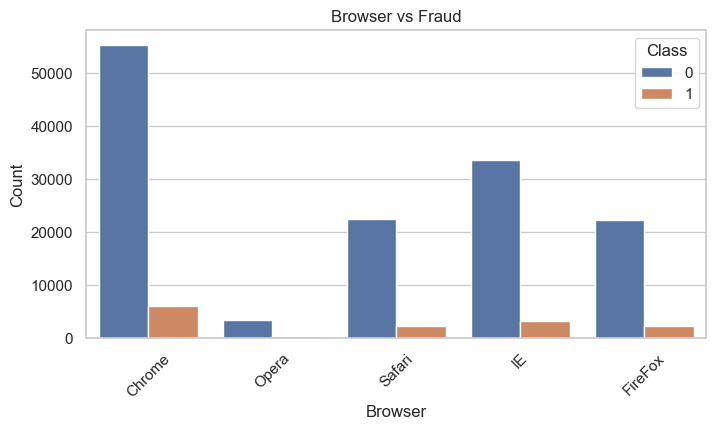

In [13]:
plt.figure(figsize=(8,4))
sns.countplot(x='browser', hue='class', data=fraud_df)
plt.title("Browser vs Fraud")
plt.xlabel("Browser")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Class")
plt.show()


In [ ]:
## Browser vs Fraud

Browsers with higher overall usage also show a higher number of fraudulent
transactions in absolute terms. However, this pattern may largely reflect
transaction volume rather than an increased fraud risk associated with
specific browsers.

This suggests that browser type alone may not be a strong standalone
indicator of fraud, but it could still contribute useful information
when combined with other behavioral features in a predictive model.



In [7]:
print(fraud_df.columns)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')


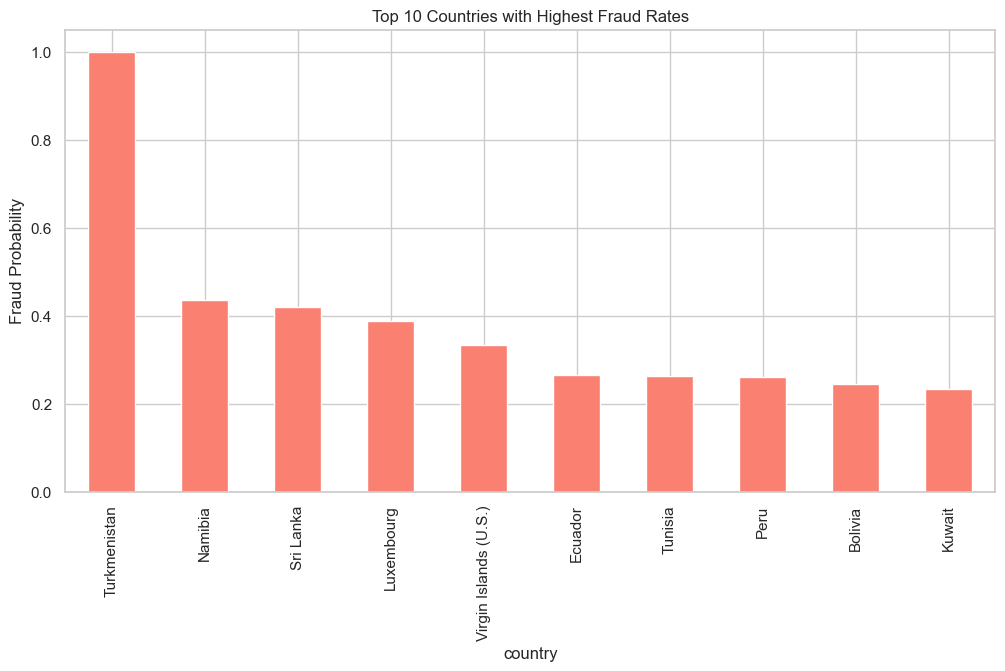

In [11]:
# 1. Load the country mapping file
# (Make sure this file is in your folder!)
ip_to_country = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# 2. Function to match IP to Country
def map_ip_to_country(ip):
    # Find the row where the IP falls between the lower and upper bounds
    match = ip_to_country[(ip >= ip_to_country['lower_bound_ip_address']) & 
                         (ip <= ip_to_country['upper_bound_ip_address'])]
    if not match.empty:
        return match.iloc[0]['country']
    return "Unknown"

# 3. Apply it to a sample (it can be slow on large data)
fraud_df['country'] = fraud_df['ip_address'].apply(map_ip_to_country)

# 4. Now run the analysis again
country_fraud = fraud_df.groupby('country')['class'].mean().sort_values(ascending=False).head(10)

# Visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
country_fraud.plot(kind='bar', color='salmon')
plt.title('Top 10 Countries with Highest Fraud Rates')
plt.ylabel('Fraud Probability')
plt.show()